# Mini Project 2: Credit Card Fraudulent Detection Using Machine Learning Techiniques.

 The goal of this project is to build models that can accurately identify fraudulent transactions using machine learning techniques.

In [1]:
# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [2]:
# 2. Load the Dataset
data = pd.read_csv('creditcard.csv')

In [3]:
# 3. Understanding the Data
# Display the shape and first few rows of the dataset
print("Shape of the dataset:", data.shape)
data.head()

Shape of the dataset: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Checking for Missing Values
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [5]:
# Summary Statistics
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Visualize the class distribution to understand the imbalance in our dataset."

Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


C:\Users\TUF\AppData\Local\Temp\ipykernel_7912\1537522035.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='coolwarm')


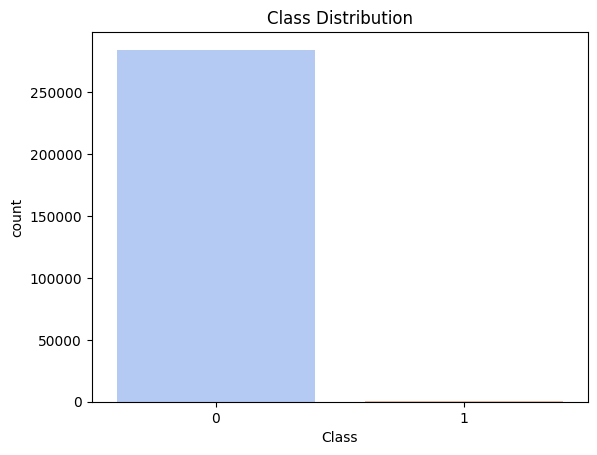

In [6]:
# Class Distribution
class_distribution = data['Class'].value_counts()
print("Class distribution:\n", class_distribution)
sns.countplot(x='Class', data=data, palette='coolwarm')
plt.title("Class Distribution")
plt.show()

# Visualize the feature distributions (V1-V28)

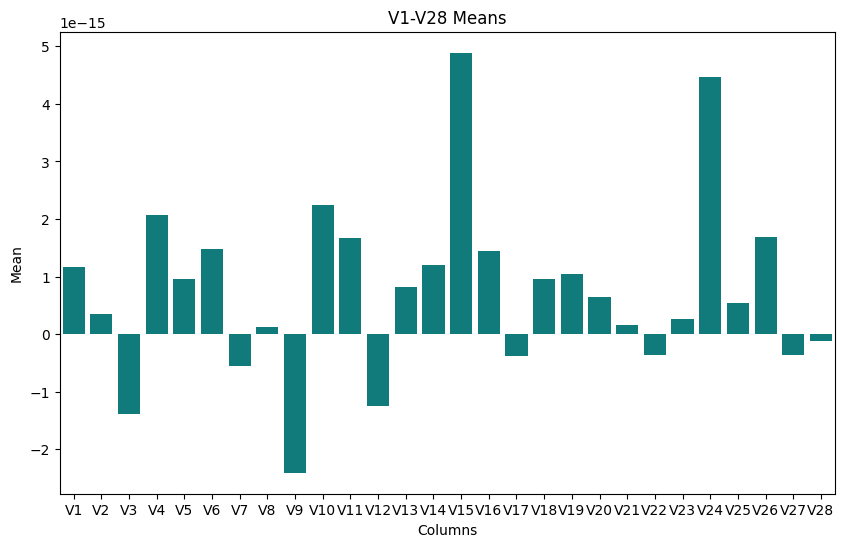

In [7]:
# Data Visualization
vs = data.drop(labels=["Time", "Amount","Class"], axis=1)
plt.figure(figsize=(10,6))
sns.barplot(x=vs.columns, y=vs.mean(), color="darkcyan")
plt.xlabel("Columns")
plt.ylabel("Mean")
plt.title("V1-V28 Means");

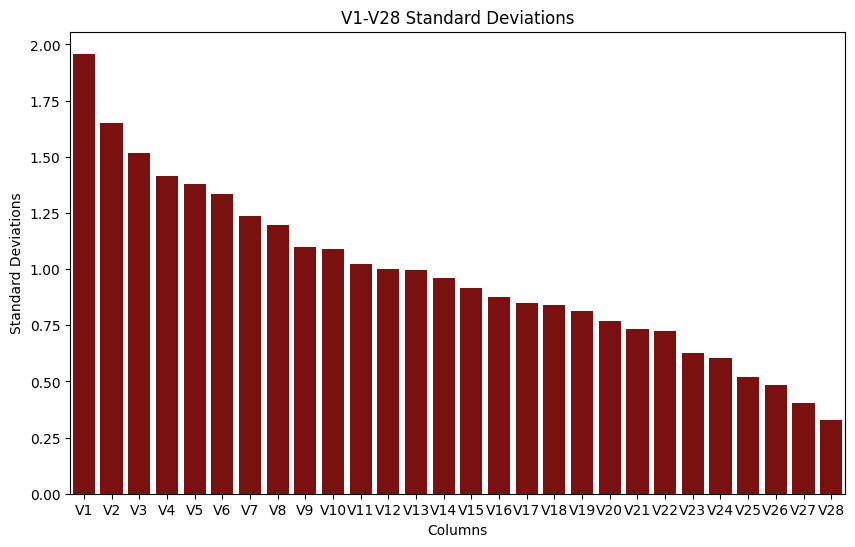

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(x=vs.columns, y=vs.std(), color="darkred")
plt.xlabel("Columns")
plt.ylabel("Standard Deviations")
plt.title("V1-V28 Standard Deviations");

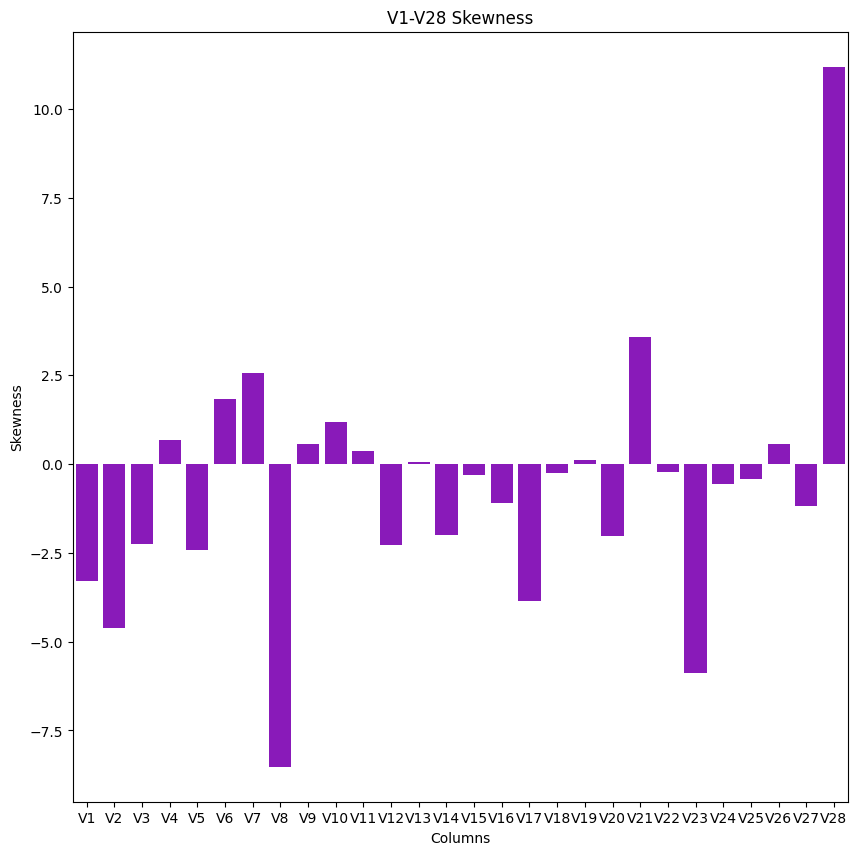

In [9]:
plt.figure(figsize=(10,10))
sns.barplot(x=vs.columns, y=vs.skew(), color="darkviolet")
plt.xlabel("Columns")
plt.ylabel("Skewness")
plt.title("V1-V28 Skewness");

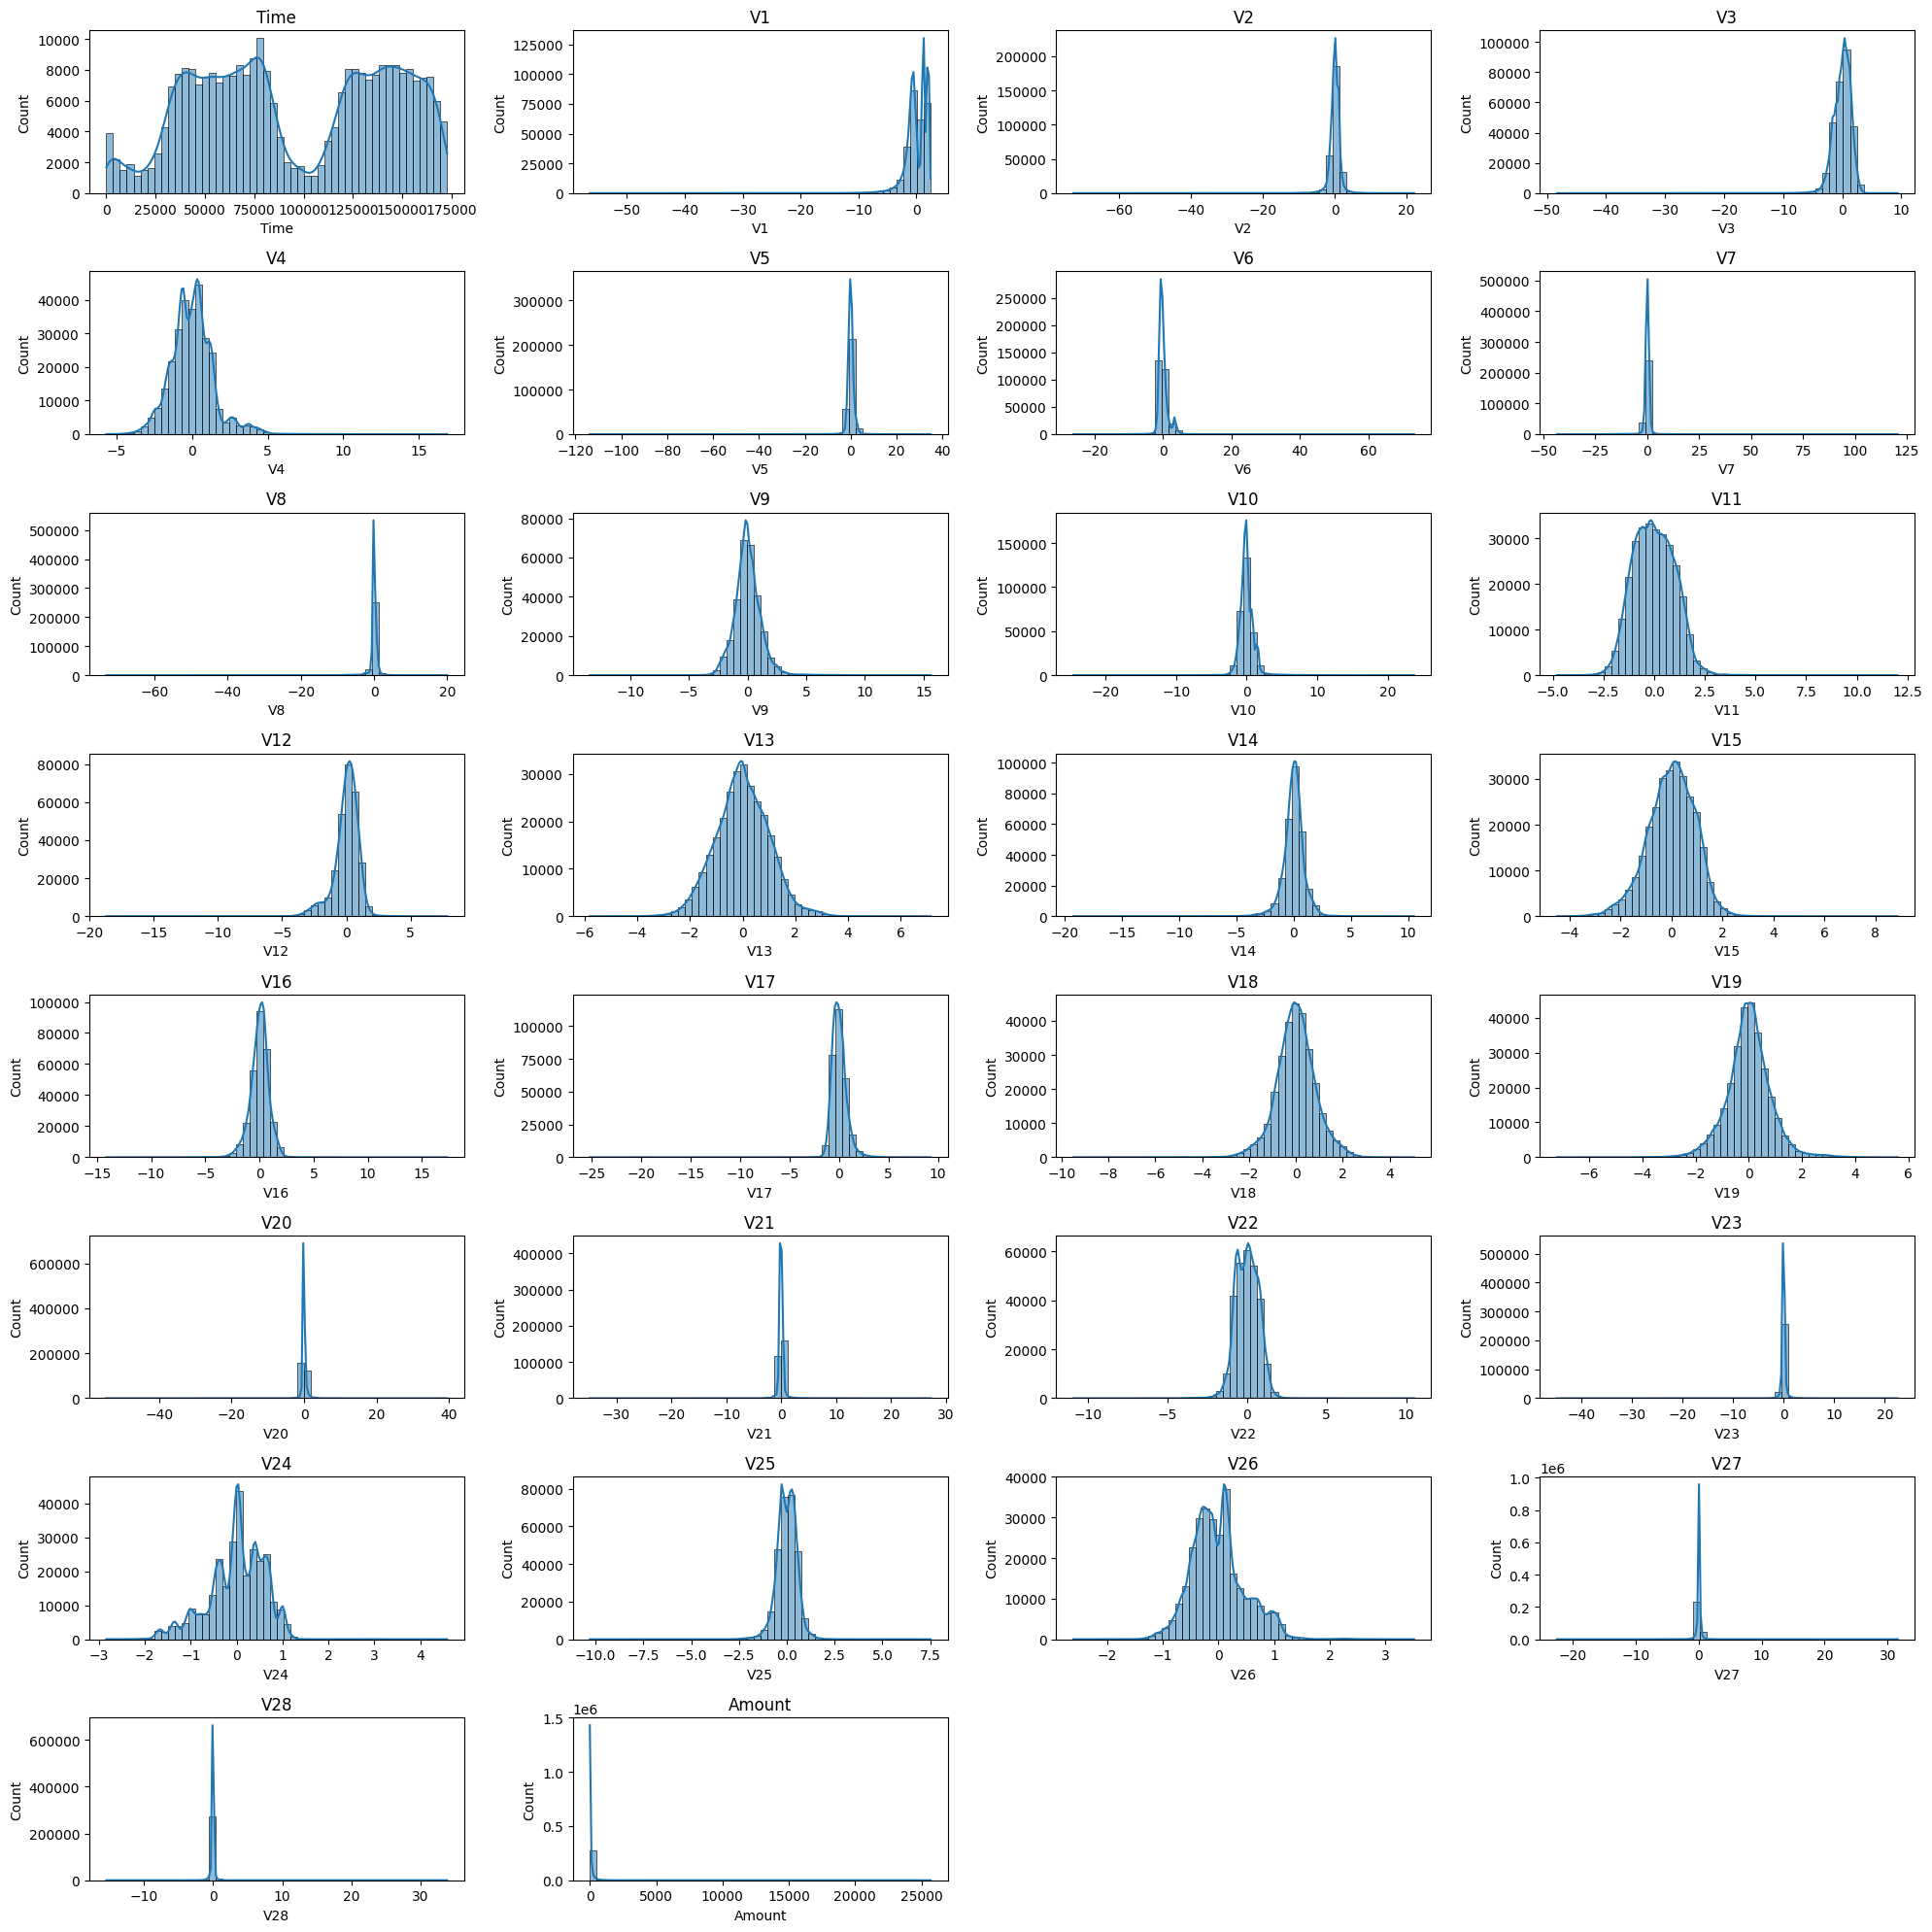

In [10]:
# Feature Distributions
plt.figure(figsize=(20, 20))
num_cols = len(data.columns) - 1
rows = (num_cols // 4) + 1  # Adjust the number of rows to fit all subplots

for i, col in enumerate(data.columns[:-1]):
    plt.subplot(rows, 4, i + 1)
    sns.histplot(data[col], bins=50, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

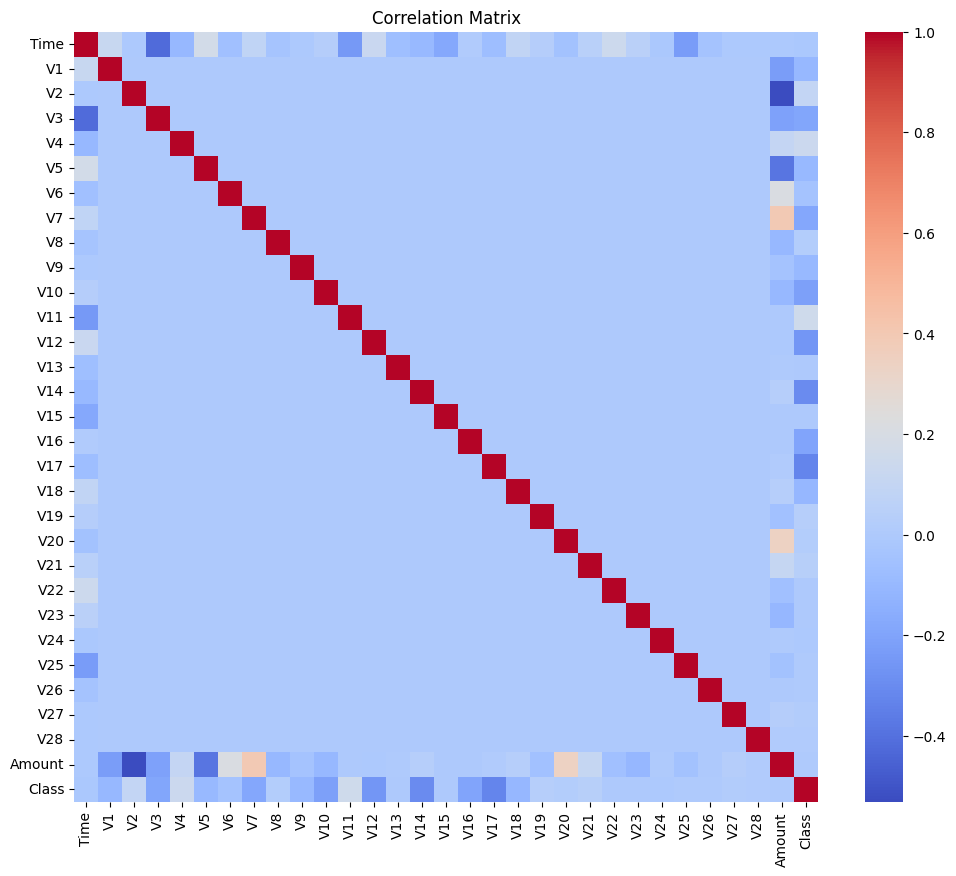

In [11]:
# Correlation Matrix and Heatmap (all columns)
corr_matrix = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [12]:
# Correlation with Target Variable
corr_with_target = corr_matrix["Class"].sort_values(ascending=False)
print("Correlation with target variable:\n", corr_with_target)

Correlation with target variable:
 Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


In [13]:
# 5. Feature Engineering
# Define features and target
X = data.drop(columns=['Class'])
y = data['Class']
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# 6. Handling Imbalanced Data
# Resampling using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

print("Resampled class distribution:\n", pd.Series(y_res).value_counts())

Resampled class distribution:
 Class
0    284315
1    284315
Name: count, dtype: int64


In [15]:
# 7. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

Logistic Regression
Accuracy: 0.9500729824314581
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     56750
           1       0.97      0.92      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

Confusion Matrix:
 [[55361  1389]
 [ 4289 52687]]


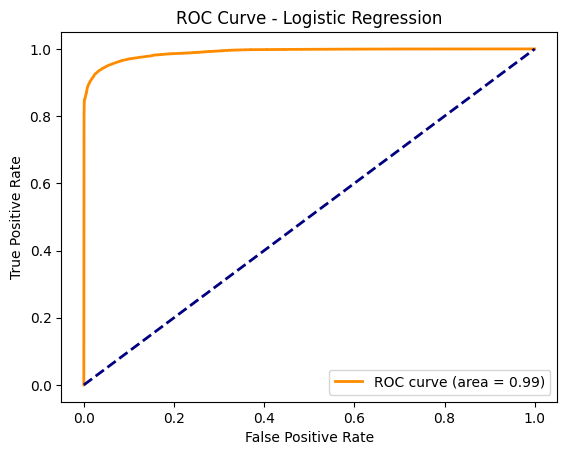

In [16]:
# 8. Model Building and Evaluation
# Logistic Regression Model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
logreg_y_pred = logreg.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, logreg_y_pred))
print("Classification Report:\n", classification_report(y_test, logreg_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, logreg_y_pred))

fpr, tpr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

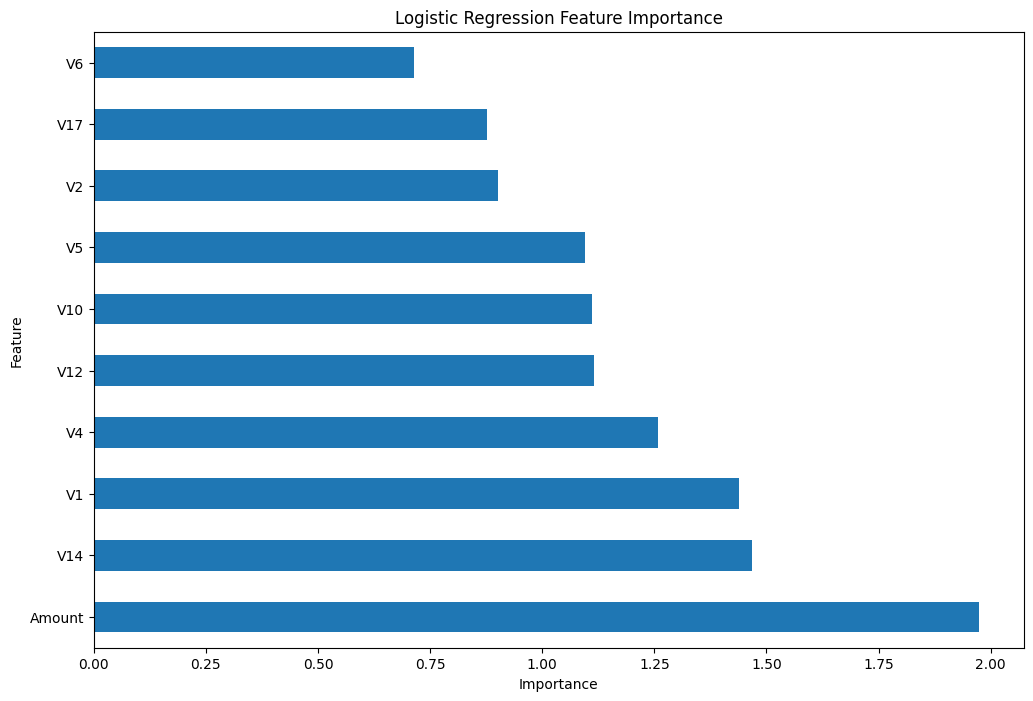

In [17]:
# Logistic Regression Feature Importance
logreg_importance = np.abs(logreg.coef_[0])
plt.figure(figsize=(12, 8))
feat_importances = pd.Series(logreg_importance, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Logistic Regression Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Neural Network
Accuracy: 0.999806552591316
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
 [[56728    22]
 [    0 56976]]


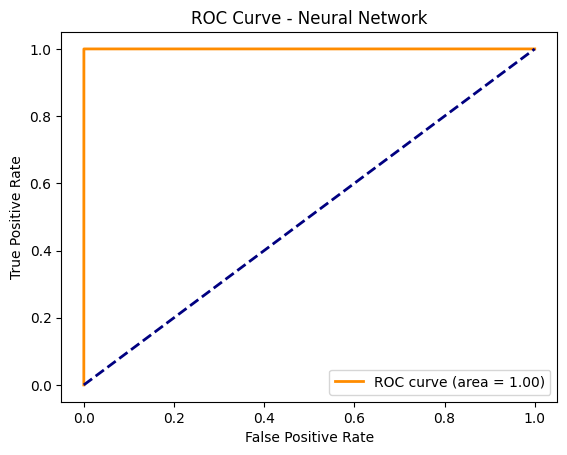

In [18]:
# Neural Network Model
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
mlp_y_pred = mlp.predict(X_test)

print("Neural Network")
print("Accuracy:", accuracy_score(y_test, mlp_y_pred))
print("Classification Report:\n", classification_report(y_test, mlp_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, mlp_y_pred))

fpr, tpr, _ = roc_curve(y_test, mlp.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc="lower right")
plt.show()

Random Forest
Accuracy: 0.9998944832316269
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
 [[56738    12]
 [    0 56976]]


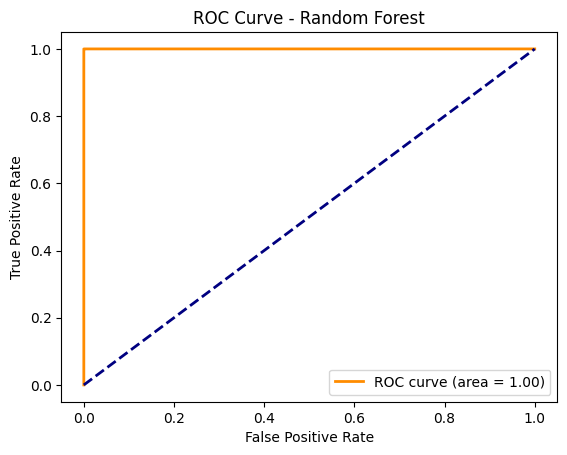

In [19]:
# Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Classification Report:\n", classification_report(y_test, rf_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))

fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

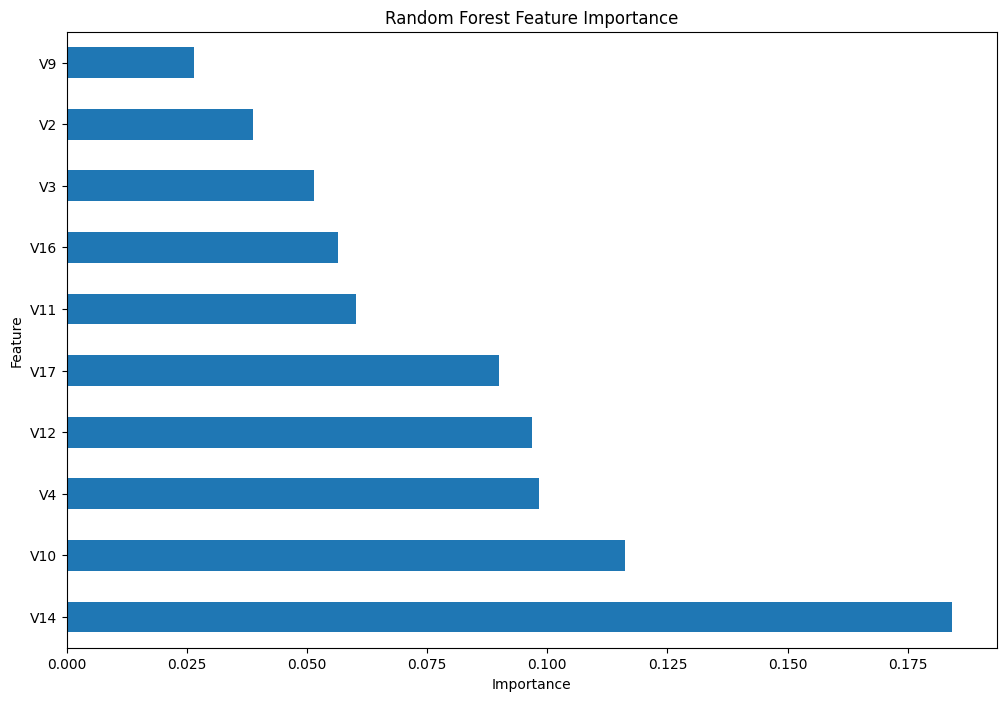

In [20]:
# Feature Importance
plt.figure(figsize=(12, 8))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Text(0.5, 0, 'Metric')

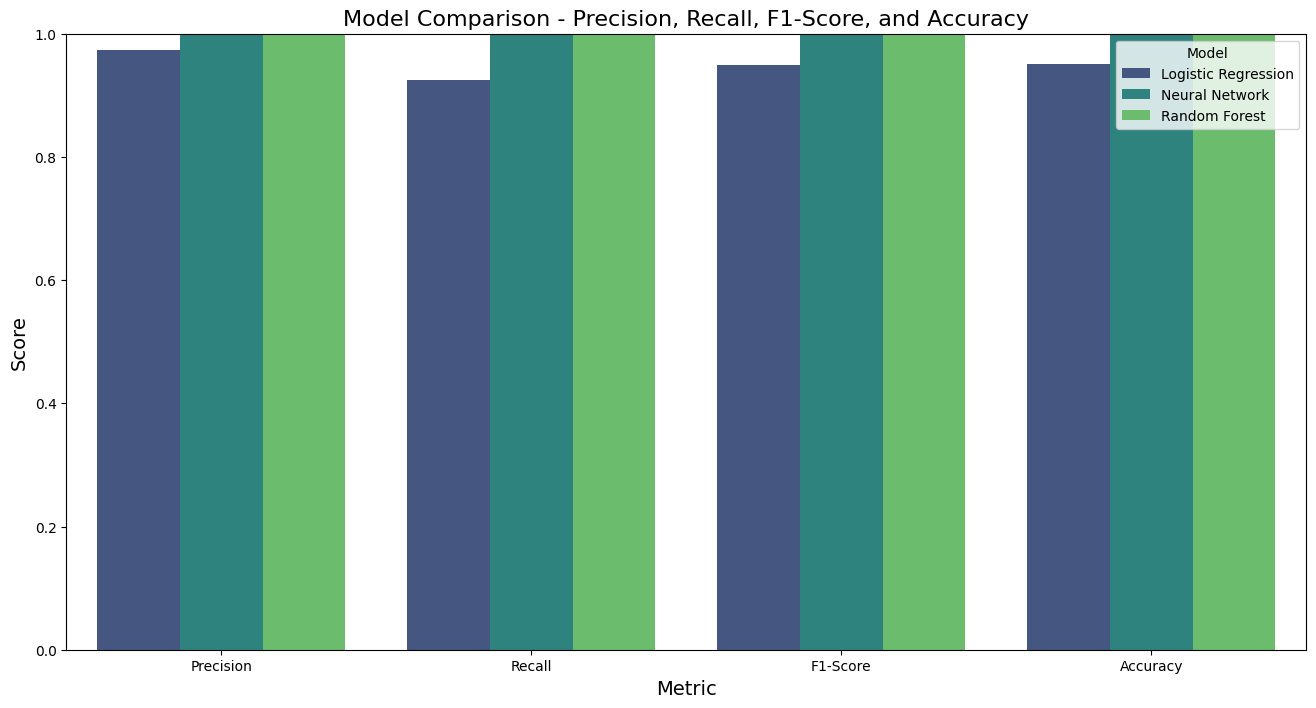

In [21]:
# Generate classification reports
logreg_report = classification_report(y_test, logreg_y_pred, output_dict=True)
mlp_report = classification_report(y_test, mlp_y_pred, output_dict=True)
rf_report = classification_report(y_test, rf_y_pred, output_dict=True)

# Extract metrics for class 1 (fraudulent transactions) and overall accuracy
logreg_metrics = {
  'Model': 'Logistic Regression',
  'Precision': logreg_report['1']['precision'],
  'Recall': logreg_report['1']['recall'],
  'F1-Score': logreg_report['1']['f1-score'],
  'Accuracy': accuracy_score(y_test, logreg_y_pred)
}

mlp_metrics = {
  'Model': 'Neural Network',
  'Precision': mlp_report['1']['precision'],
  'Recall': mlp_report['1']['recall'],
  'F1-Score': mlp_report['1']['f1-score'],
  'Accuracy': accuracy_score(y_test, mlp_y_pred)
}

rf_metrics = {
  'Model': 'Random Forest',
  'Precision': rf_report['1']['precision'],
  'Recall': rf_report['1']['recall'],
  'F1-Score': rf_report['1']['f1-score'],
  'Accuracy': accuracy_score(y_test, rf_y_pred)
}

# Combine metrics into a DataFrame
metrics_df = pd.DataFrame([logreg_metrics, mlp_metrics, rf_metrics])

# Melt the DataFrame for easier plotting
metrics_melted_df = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Highlight class 1 (fraudulent transactions)
class_1_color = 'coral'  # Adjust color as desired

# Customize x-axis labels
metric_labels = {'Precision': 'Precis.', 'Recall': 'Recall',
                 'F1-Score': 'F1', 'Accuracy': 'Accu.'}

# Plot comparison for each metric
plt.figure(figsize=(16, 8))
sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_melted_df,
            palette='viridis')  # Removed errbar argument
plt.title('Model Comparison - Precision, Recall, F1-Score, and Accuracy', fontsize=16)
plt.ylim(0, 1)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Metric', fontsize=14)

<Figure size 600x600 with 0 Axes>

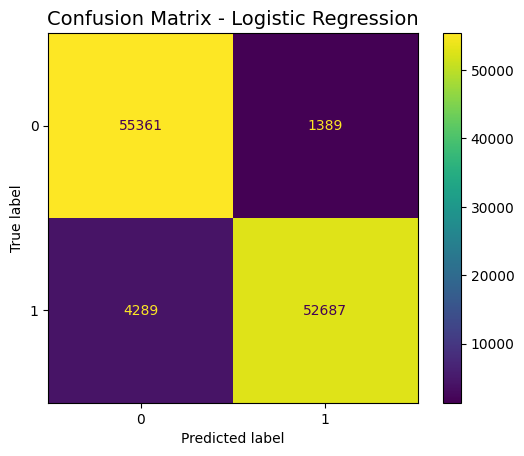

<Figure size 600x600 with 0 Axes>

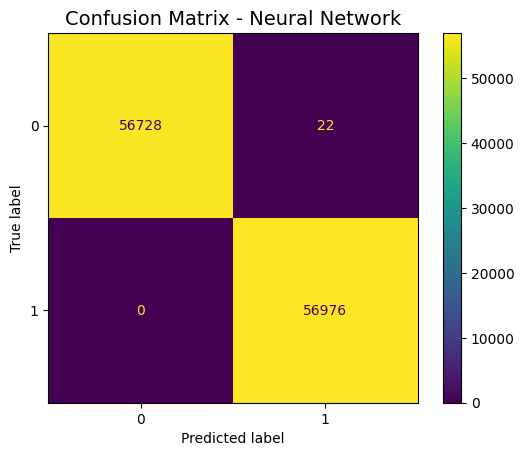

<Figure size 600x600 with 0 Axes>

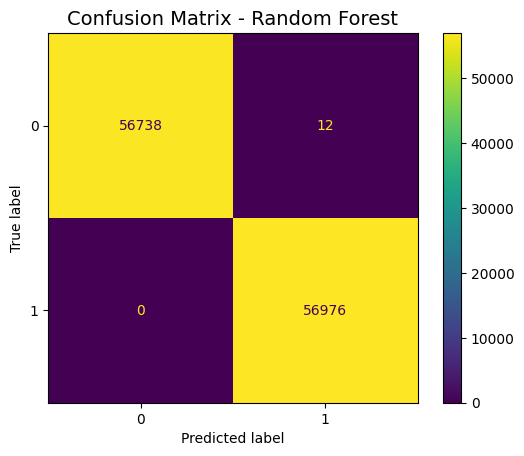

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
# Confusion Matrices
models = [('Logistic Regression', logreg, logreg_y_pred),
          ('Neural Network', mlp, mlp_y_pred),
          ('Random Forest', rf, rf_y_pred)]

for model_name, model, y_pred in models:
    plt.figure(figsize=(6, 6))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='viridis')
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14)
    plt.grid(False)
    plt.show()